In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.tail()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145
16636,11/30/12,4,23,0,1,2,0.75,6,6.10,5.0012,11,99


In [ ]:
# separate dteday into year, month, and day
year = []
month = []
day = []

for dte in bikes['dteday']:
  date = dte.split('/')
  month.append(int(date[0]))
  day.append(int(date[1]))
  year.append(int(date[2]))

bikes['year'] = year
bikes['month'] = month
bikes['day'] = day

bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,year,month,day
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,11,1,1
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,11,1,1
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,11,1,1
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,11,1,1
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,11,1,1


In [ ]:
# combined casual and registered to one column
total_users = []
for i in range(len(bikes)):
  total_users.append(bikes['casual'][i] + bikes['registered'][i])

bikes['total_users'] = total_users

bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,year,month,day,total_users
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,11,1,1,16
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,11,1,1,40
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,11,1,1,32
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,11,1,1,13
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,11,1,1,1


In [ ]:
bikes.describe()

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,year,month,day,total_users
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,36.471239,154.005770,11.480375,6.294164,15.670313,190.477009
std,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,49.995203,151.319818,0.499630,3.310969,8.782122,182.026755
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000
25%,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,4.000000,35.000000,11.000000,3.000000,8.000000,41.000000
50%,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,17.000000,116.000000,11.000000,6.000000,16.000000,143.000000
75%,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,50.000000,220.000000,12.000000,9.000000,23.000000,282.000000
max,4.000000,23.000000,1.000000,1.000000,4.000000,1.000000,57.000000,39.000000,50.000000,367.000000,886.000000,12.000000,12.000000,31.000000,977.000000


In [ ]:
# Import the libraries we need 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# holdout
X = bikes.drop(columns=["dteday", "casual", "registered", "total_users"])

# predict
#y = bikes[["casual", "registered"]]
y = bikes[["total_users"]]

In [ ]:
X

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,year,month,day
0,1,0,0,0,1,0.81,0,3.28,3.0014,11,1,1
1,1,1,0,0,1,0.80,0,2.34,1.9982,11,1,1
2,1,2,0,0,1,0.80,0,2.34,1.9982,11,1,1
3,1,3,0,0,1,0.75,0,3.28,3.0014,11,1,1
4,1,4,0,0,1,0.75,0,3.28,3.0014,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,4,19,0,1,1,0.66,0,7.04,7.0010,12,11,30
16633,4,20,0,1,1,0.66,0,7.04,7.0010,12,11,30
16634,4,21,0,1,1,0.75,6,6.10,5.0012,12,11,30
16635,4,22,0,1,1,0.75,0,6.10,5.9978,12,11,30


In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
y_train

,total_users
4013,2
6672,370
12584,255
4395,16
8991,234
...,...
12705,219
15410,362
13683,127
14817,371


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
# output layer
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_17 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_82 (Dense)            (None, 64)                8256      
                                                                 
 dense_83 (Dense)            (None, 16)                1040      
                                                                 
 dense_84 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11,489
Trainable params: 11,233
Non-trainable params: 256
_______________________________________________

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
379/379 [==============================] - 1s 3ms/step - loss: 5054.1665 - mse: 5054.1665 - val_loss: 5818.9199 - val_mse: 5818.9199
Epoch 2/2000
379/379 [==============================] - 1s 3ms/step - loss: 5031.0127 - mse: 5031.0127 - val_loss: 5771.5493 - val_mse: 5771.5498
Epoch 3/2000
379/379 [==============================] - 1s 3ms/step - loss: 5014.1333 - mse: 5014.1333 - val_loss: 5881.8950 - val_mse: 5881.8950
Epoch 4/2000
379/379 [==============================] - 1s 3ms/step - loss: 4995.1860 - mse: 4995.1860 - val_loss: 5812.2178 - val_mse: 5812.2178
Epoch 5/2000
379/379 [==============================] - 1s 3ms/step - loss: 4972.9683 - mse: 4972.9683 - val_loss: 5785.0674 - val_mse: 5785.0674
Epoch 6/2000
379/379 [==============================] - 1s 3ms/step - loss: 4948.9893 - mse: 4948.9893 - val_loss: 5692.9692 - val_mse: 5692.9692
Epoch 7/2000
379/379 [==============================] - 1s 3ms/step - loss: 4926.0269 - mse: 4926.0269 - val_loss: 5768.4009

In [ ]:
hist

,loss,mse,val_loss,val_mse
0,34020.140625,34020.144531,31295.955078,31295.955078
1,20718.964844,20718.964844,20163.230469,20163.230469
2,20218.039062,20218.039062,19460.166016,19460.166016
3,19457.791016,19457.791016,18693.785156,18693.785156
4,18609.898438,18609.898438,17970.673828,17970.673828
...,...,...,...,...
195,5167.704102,5167.704102,5845.620605,5845.620605
196,5142.338867,5142.338379,5782.873047,5782.873047
197,5120.663086,5120.663086,5879.639648,5879.639648
198,5094.749512,5094.749512,5837.987793,5837.987793


In [ ]:
# h = hist
hist = hist.reset_index()
# h

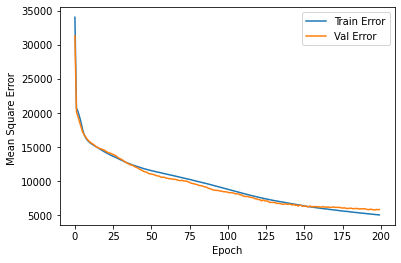

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
predictions = np.round(model.predict(X_test),1)

156/156 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([[419. ],
       [ 81.1],
       [128.3],
       ...,
       [209.5],
       [150.8],
       [532.2]], dtype=float32)

In [ ]:
result = mean_squared_error(y_test, predictions, squared=False)
result

77.53760546770644

In [ ]:
r2 = r2_score(y_test,predictions)
r2

0.8211192433611227

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

AttributeError: ignored